In [3]:
from keras.datasets import mnist
from sklearn.linear_model import SGDClassifier
import numpy as np
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
shuffle_index = np.random.permutation(60000)
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

Y_train5 = (Y_train == 5)
Y_test5 = (Y_test == 5)
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, Y_train5)
print(sgd_clf.predict(X_test))


Using TensorFlow backend.


[False False False ... False  True False]


In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, Y_train5):
    print("trainIndex: ", train_index)
    print("testIndex: ", test_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    Y_train_folds = Y_train5[train_index]
    X_test_fold = X_train[test_index]
    Y_test_fold = Y_train5[test_index]
    
    clone_clf.fit(X_train_folds, Y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == Y_test_fold)
    print(n_correct/len(y_pred))

trainIndex:  [19976 19977 19978 ... 59997 59998 59999]
testIndex:  [    0     1     2 ... 20242 20256 20279]


0.955
trainIndex:  [    0     1     2 ... 59997 59998 59999]
testIndex:  [19976 19977 19978 ... 39997 39998 40009]


0.9653
trainIndex:  [    0     1     2 ... 39997 39998 40009]
testIndex:  [39999 40000 40001 ... 59997 59998 59999]


0.95675


In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train5, cv=3, scoring="accuracy")

array([0.955  , 0.9653 , 0.95675])

In [6]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, Y=None):
        pass 
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

In [7]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, Y_train5, cv=3, scoring="accuracy")

array([0.9107 , 0.90865, 0.9096 ])

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train5, cv=3)

In [10]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train5, y_train_pred)

array([[53595,   984],
       [ 1475,  3946]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train5, y_train_pred)


0.8004056795131845

In [13]:
recall_score(Y_train5, y_train_pred)

0.7279099797085409

In [14]:
from sklearn.metrics import f1_score
f1_score(Y_train5, y_train_pred)

0.7624384117476573

In [15]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([-757433.4429505 ,  -60963.91979596, -215670.08161045, ...,
       -454875.3945849 , -318049.1925045 , -258181.1198531 ])

In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, Y_train5, cv=3,
                             method="decision_function")

array([-1251945.73760084,  -525855.80680518,  -484698.03985111, ...,
        -464399.85899913,  -503202.73861544,  -280098.34506124])

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train5, y_scores)
precisions, recalls, thresholds

(array([0.09065369, 0.09063848, 0.09064   , ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-1915453.91425842, -1914853.56301289, -1911228.56985372, ...,
          885564.12092114,   899525.43416151,   913949.26148726]))

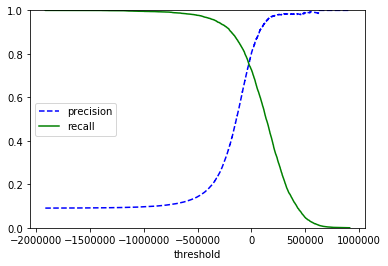

In [22]:
from matplotlib import pyplot as plt 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='precision')
    plt.plot(thresholds, recalls[:-1], "g-", label='recall')
    plt.xlabel("threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [24]:
y_train_pred_90 = (y_scores > 70000)
precision_score(Y_train5, y_train_pred_90)

0.8937699680511182

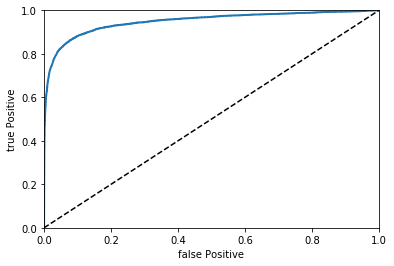

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('false Positive')
    plt.ylabel('true Positive')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train5, y_scores)

0.948760767800188